In [1]:
import sys
sys.path.append("D:\python\lib\site-packages")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import pandas as pd

import itertools

from sklearn import preprocessing, svm, utils, datasets
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [2]:
data_app = pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',')
print(data_app.shape)

head = data_app.columns
print(head)

(10841, 13)
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [3]:
print(data_app.shape)

head = data_app.columns
print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

data_app_c = np.array(data_app)

i=0
for i in range(len(data_app_c[:])):
    if data_app_c[i][5] == "Free":
        print("THIS: ", data_app_c[i])
        data_app_c1 = np.delete(data_app_c, i, 0)

data_app_c = data_app_c1


i=0
for i in range(len(data_app_c[:])):
    for char in data_app_c[i][5]:
        if char in " ?.!/;:+,":
            data_app_c[i][5] = data_app_c[i][5].replace(char,'')
    if float(data_app_c[i][5]) <= 100:
        data_app_c[i][5] = 100
    if float(data_app_c[i][5]) > 100 and int(data_app_c[i][5])<= 5000:
        data_app_c[i][5] = 5000
    if float(data_app_c[i][5]) > 5000 and int(data_app_c[i][5])<= 50000:
        data_app_c[i][5] = 50000
    if float(data_app_c[i][5]) > 50000 and int(data_app_c[i][5])<= 500000:
        data_app_c[i][5] = 500000
    if float(data_app_c[i][5]) > 500000 and int(data_app_c[i][5])<= 5000000:
        data_app_c[i][5] = 5000000
    if float(data_app_c[i][5]) > 5000000:
        data_app_c[i][5] = 10000000
        
for i in range(len(data_app_c[:])):
    if data_app_c[i][4].endswith("M"):
        data_app_c[i][4] = data_app_c[i][4][:-1]
    if data_app_c[i][4] == "Varies with device":
        data_app_c[i][4] = float("NaN")
    elif data_app_c[i][4].endswith("k"):
        data_app_c[i][4] = float(data_app_c[i][4][:-1])/1000
    if data_app_c[i][2] == "#¡NUM!":
        data_app_c[i][2] = float("NaN")
    if data_app_c[i][6] == 'Free':     #free is encoded as 0
        data_app_c[i][6] = 0
    if data_app_c[i][6] == 'Paid':     #paid is encoded as 1
        data_app_c[i][6] = 1 
 
print(data_app_c[2])


(10841, 13)
----
0 App
1 Category
2 Rating
3 Reviews
4 Size
5 Installs
6 Type
7 Price
8 Content Rating
9 Genres
10 Last Updated
11 Current Ver
12 Android Ver
----
THIS:  ['Life Made WI-Fi Touchscreen Photo Frame' '1.9' 19.0 '3.0M' '1,000+'
 'Free' '0' 'Everyone' nan 'February 11, 2018' '1.0.19' '4.0 and up' nan]
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [4]:
data_app_cN = pd.DataFrame(data_app_c)
data_app_cN = data_app_cN .dropna()

data_app_cN = data_app_cN.values
print(data_app_c.shape)
print(data_app_cN.shape)

print(data_app_c[2])
print(data_app_cN[2])

(10840, 13)
(7723, 13)
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [5]:
#transforming numerical values to float 
for i in range(len(data_app_c[:])):
    data_app_c[i][2] = float(data_app_c[i][2]) #Rating
    data_app_c[i][3] = float(data_app_c[i][3]) #Reviews
    data_app_c[i][4] = float(data_app_c[i][4]) #Size
    data_app_c[i][5] = int(data_app_c[i][5]) #Installs

        
#delete the name category for everything
del_categories = [0, 7, 9, 10, 11, 12]
data_app_c = np.delete(data_app_c, del_categories, 1)
data_app_cN = np.delete(data_app_cN, del_categories, 1)
head = np.delete(head, del_categories)

print(data_app_c.shape)
print(data_app_cN.shape)
print("----")


print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

# columns = [1'Category', 2'Rating', 3'Reviews', 4'Size', 5 Installs', 6'Type', 7'Content Rating'])


(10840, 7)
(7723, 7)
----
----
0 Category
1 Rating
2 Reviews
3 Size
4 Installs
5 Type
6 Content Rating
----


In [6]:
le = preprocessing.LabelEncoder()

a = le.fit_transform(data_app_cN.T[0].astype(str)) #Category
data_app_cN.T[0] = a
a = le.fit_transform(data_app_cN.T[5].astype(str)) #Type
data_app_cN.T[5] = a
a = le.fit_transform(data_app_cN.T[6].astype(str)) #Content Rating
data_app_cN.T[6] = a


#transforming numerical values to float 
for i in range(len(data_app_cN[:])):
    for h in range(len(head)):
        data_app_cN[i][h] = float(data_app_cN[i][h])

#transforming numerical values to float 
for i in range(len(data_app_cN[:])):
    data_app_cN[i][4] = int(data_app_cN[i][4])


print(data_app_cN)
print(data_app_cN.shape)

[[0.0 4.1 159.0 ... 50000 0.0 1.0]
 [0.0 3.9 967.0 ... 500000 0.0 1.0]
 [0.0 4.7 87510.0 ... 5000000 0.0 1.0]
 ...
 [11.0 4.5 38.0 ... 5000 0.0 1.0]
 [11.0 5.0 4.0 ... 100 0.0 1.0]
 [18.0 4.5 398307.0 ... 10000000 0.0 1.0]]
(7723, 7)


# Feature Importances

Index(['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Content Rating'], dtype='object')
Feature ranking:
1. feature 2 (0.503813)
Reviews 0.5038128337729724
2. feature 3 (0.195398)
Size 0.1953975165850007
3. feature 1 (0.147305)
Rating 0.14730495755803943
4. feature 0 (0.118761)
Category 0.11876124103256906
5. feature 5 (0.019742)
Content Rating 0.0197415312108242
6. feature 4 (0.014982)
Type 0.014981919840594054


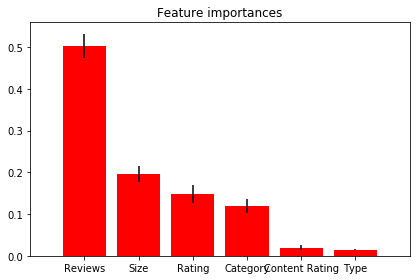

In [28]:
#FEATURE IMPORTANCES
from sklearn.ensemble import ExtraTreesClassifier

Xa = data_app_cN[:, [0, 1, 2, 3, 5, 6]]
Ya = data_app_cN[:,4]
X_head = np.delete(head, 4)
print(X_head)
#features_names = np.unique(Ya.astype('int')).astype("str")

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(Xa.astype("float"), Ya.astype("int"))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xa.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(X_head[indices[f]], importances[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.tight_layout()
plt.bar(range(Xa.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Xa.shape[1]), X_head[indices])
plt.xlim([-1, Xa.shape[1]])
plt.show()

# Classification: fitting and prediction

In [ ]:
# split into input (X) and output (Y) variables
Xa = data_app_cN[:, [0, 1, 2, 3, 5, 6]]
#Xa = data_app_cN[:, [0, 1, 3, 5, 6]]
Ya = data_app_cN[:,4]

X_train, X_test, y_train, y_test = train_test_split(Xa, Ya, test_size=0.2, random_state=42)

print(X_train, X_test, y_train, y_test)

#print(utils.multiclass.type_of_target(y_train.astype('int')))

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train.astype('float'), y_train.astype('int'))
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred = clf.predict(X_test.astype('float'))
print(X_test.shape)

print("Accuracy score: ", accuracy_score(y_test.astype('int'), pred.astype("int")))

install_win = np.unique(y_train.astype('int')).astype("str")
print(install_win)

print(classification_report(y_test.astype('int'), pred.astype("int"), target_names=install_win, sample_weight=None, digits=3))

In [ ]:
gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=1)
BNB = BernoulliNB()
LR = LogisticRegression()
SVC = SVC()
SDG = SGDClassifier()
LSVC = LinearSVC()

x1, x2, y1, y2 = X_train, X_test, y_train, y_test

# Train our classifier and test predict
gnb.fit(x1.astype("float"), y1.astype("int"))
y2_GNB_model = gnb.predict(x2.astype("float"))
print("GaussianNB Accuracy :", accuracy_score(y2.astype("int"), y2_GNB_model.astype("int")))

KNN.fit(x1.astype("float"),y1.astype("int"))
y2_KNN_model = KNN.predict(x2.astype("float"))
print("KNN Accuracy :", accuracy_score(y2.astype("int"), y2_KNN_model.astype("int")))

BNB.fit(x1.astype("float"),y1.astype("int"))
y2_BNB_model = BNB.predict(x2.astype("float"))
print("BNB Accuracy :", accuracy_score(y2.astype("int"), y2_BNB_model.astype("int")))

LR.fit(x1.astype("float"),y1.astype("int"))
y2_LR_model = LR.predict(x2.astype("float"))
print("LR Accuracy :", accuracy_score(y2.astype("int"), y2_LR_model.astype("int")))

SDG.fit(x1.astype("float"),y1.astype("int"))
y2_SDG_model = SDG.predict(x2.astype("float"))
print("SDG Accuracy :", accuracy_score(y2.astype("int"), y2_SDG_model.astype("int")))

SVC.fit(x1.astype("float"),y1.astype("int"))
y2_SVC_model = SVC.predict(x2.astype("float"))
print("SVC Accuracy :", accuracy_score(y2.astype("int"), y2_SVC_model.astype("int")))

LSVC.fit(x1.astype("float"),y1.astype("int"))
y2_LSVC_model = LSVC.predict(x2.astype("float"))
print("LSVC Accuracy :", accuracy_score(y2.astype("int"), y2_LSVC_model.astype("int")))


# Confusion Matrix Plotting

In [ ]:
class_names = install_win

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

models = [y2_GNB_model, y2_KNN_model, y2_BNB_model, y2_LR_model, y2_SDG_model, y2_SVC_model, y2_LSVC_model]
modelNames = ["GaussianNB", "KNeighborsClassifier", "BernoulliNB", "LogisticRegression", "SGDClassifier", "SVC", "LinearSVC"]

for i in range(len(models)):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y2.astype("int"), models[i].astype("int"))
    np.set_printoptions(precision=2)
    
    A = (modelNames[i] + ' Confusion Matrix (not normalized)')
    B = (modelNames[i] + ' Normalized Confusion Matrix')
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title = A)
    plt.savefig("./Plots\Confusion Matrix/All80-20_"+A+'.png')
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title = B)
    plt.savefig("./Plots\Confusion Matrix/All80-20_"+B+'.png')

#plt.show()